<a href="https://colab.research.google.com/github/PraeJi/Brain-Tumor-Detection/blob/main/1_brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Yolov8 and Download Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
from IPython import display

In [ ]:
!pip install ultralytics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
#!git clone https://git-ai.inet-th.net/panu.ru/set_yolov8.git

In [ ]:
!pwd

/content


In [ ]:
import os
path = '/content/set_yolov8'
sub_path = '/content/set_yolov8/data'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

if not os.path.exists(sub_path):
  os.mkdir(sub_path)
  print("Folder %s created!" % sub_path)
else:
  print("Folder %s already exists" % sub_path)

Folder /content/set_yolov8 created!
Folder /content/set_yolov8/data created!


In [ ]:
%cd /content/set_yolov8/data

/content/set_yolov8/data


In [ ]:
!kaggle datasets download -d pkdarabi/medical-image-dataset-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 97% 110M/113M [00:03<00:00, 43.3MB/s]
100% 113M/113M [00:03<00:00, 35.0MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/set_yolov8/data/medical-image-dataset-brain-tumor-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/set_yolov8/data')

# Data Collection

In [ ]:
import pandas as pd

In [ ]:
import os
from os import listdir

folder_test_img = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images"
folder_test_label = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/labels"

folder_train_img = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images"
folder_train_label = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels"

folder_val_img = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/images"
folder_val_label = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels"

In [ ]:
data_train = []
data_test = []
data_val = []

## Test DataFrame

In [ ]:
# Calculate xmin,ymin,xmax,ymax

def calculate_test(filename,x_center,y_center,width,height):
  path_img = f"{folder_test_img}/{filename}"
  im = Image.open(path_img).convert("RGB")
  img_width, img_height = im.size

  x_center_pixel = x_center * img_width
  y_center_pixel = y_center * img_height
  half_width_pixel = width * img_width / 2
  half_height_pixel = height * img_height / 2

  x_min = x_center_pixel - half_width_pixel
  y_min = y_center_pixel - half_height_pixel
  x_max = x_center_pixel + half_width_pixel
  y_max = y_center_pixel + half_height_pixel

  return x_min,y_min,x_max,y_max

In [ ]:
for labels_file in os.listdir(folder_test_label):
  file_path = f"{folder_test_label}/{labels_file}"
  file = open(file_path,"r")
  content = file.readlines()
  filename = labels_file[:-4] + '.jpg'

  for line in content:
    parts = line.strip().split()
    label = int(parts[0])
    x_center = float(parts[1])
    y_center = float(parts[2])
    width = float(parts[3])
    height = float(parts[4])

    x_min,y_min,x_max,y_max = calculate_test(filename,x_center,y_center,width,height)

    data_test.append({
      'Filename': filename,
      'Label': int(label),
      'x_Center': x_center,
      'y_Center': y_center,
      'width': width,
      'height': height,
      'x_min': x_min,
      'y_min': y_min,
      'x_max': x_max,
      'y_max': y_max,
      'path' : f"{folder_test_img}/"
    })

  file.close

In [ ]:
df_test = pd.DataFrame(data_test)
#df_test['Filename'] = df_test['Filename'] + '.jpg'
df_test.head()

,Filename,Label,x_Center,y_Center,width,height,x_min,y_min,x_max,y_max,path
0,volume_344_slice_84_jpg.rf.6800702d847676e153c...,1,0.640288,0.776515,0.388489,0.325758,62.0,81.0,116.0,124.0,/content/set_yolov8/data/TumorDetectionYolov8/...
1,volume_156_slice_46_jpg.rf.466364a15c48e3ae2c7...,0,0.348921,0.727273,0.294964,0.196970,28.0,83.0,69.0,109.0,/content/set_yolov8/data/TumorDetectionYolov8/...
2,volume_156_slice_46_jpg.rf.466364a15c48e3ae2c7...,1,0.420863,0.791667,0.438849,0.219697,28.0,90.0,89.0,119.0,/content/set_yolov8/data/TumorDetectionYolov8/...
3,volume_156_slice_46_jpg.rf.466364a15c48e3ae2c7...,2,0.359712,0.723485,0.330935,0.250000,27.0,79.0,73.0,112.0,/content/set_yolov8/data/TumorDetectionYolov8/...
4,volume_171_slice_72_jpg.rf.2303d258c009884ed25...,0,0.316547,0.382576,0.201439,0.174242,30.0,39.0,58.0,62.0,/content/set_yolov8/data/TumorDetectionYolov8/...


In [ ]:
df_test.to_csv('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/test.csv')

## Train DataFrame

In [ ]:
# Calculate xmin,ymin,xmax,ymax

def calculate_train(filename,x_center,y_center,width,height):
  path_img = f"{folder_train_img}/{filename}"
  im = Image.open(path_img).convert("RGB")
  img_width, img_height = im.size

  x_center_pixel = x_center * img_width
  y_center_pixel = y_center * img_height
  half_width_pixel = width * img_width / 2
  half_height_pixel = height * img_height / 2

  x_min = x_center_pixel - half_width_pixel
  y_min = y_center_pixel - half_height_pixel
  x_max = x_center_pixel + half_width_pixel
  y_max = y_center_pixel + half_height_pixel

  return x_min,y_min,x_max,y_max

In [ ]:
for labels_file in os.listdir(folder_train_label):
  file_path = f"{folder_train_label}/{labels_file}"
  file = open(file_path,"r")
  content = file.readlines()
  filename = labels_file[:-4] + '.jpg'

  for line in content:
    parts = line.strip().split()
    label = int(parts[0])
    x_center = float(parts[1])
    y_center = float(parts[2])
    width = float(parts[3])
    height = float(parts[4])

    x_min,y_min,x_max,y_max = calculate_train(filename,x_center,y_center,width,height)

    data_train.append({
      'Filename': filename,
      'Label': int(label),
      'x_Center': x_center,
      'y_Center': y_center,
      'width': width,
      'height': height,
      'x_min': x_min,
      'y_min': y_min,
      'x_max': x_max,
      'y_max': y_max,
      'path' : f"{folder_train_img}/"
    })

  file.close

In [ ]:
df_train = pd.DataFrame(data_train)
df_train.head()

,Filename,Label,x_Center,y_Center,width,height,x_min,y_min,x_max,y_max,path
0,volume_121_slice_89_jpg.rf.a914521e3e5df1b569d...,0,0.107914,0.712121,0.215827,0.151515,0.0,84.0,30.0,104.0,/content/set_yolov8/data/TumorDetectionYolov8/...
1,volume_121_slice_89_jpg.rf.a914521e3e5df1b569d...,1,0.280576,0.685606,0.561151,0.522727,0.0,56.0,78.0,125.0,/content/set_yolov8/data/TumorDetectionYolov8/...
2,volume_121_slice_89_jpg.rf.a914521e3e5df1b569d...,2,0.118705,0.723485,0.237410,0.234848,0.0,80.0,33.0,111.0,/content/set_yolov8/data/TumorDetectionYolov8/...
3,volume_190_slice_88_jpg.rf.0043485767462c982a8...,0,0.428058,0.829545,0.021583,0.007576,58.0,109.0,61.0,110.0,/content/set_yolov8/data/TumorDetectionYolov8/...
4,volume_190_slice_88_jpg.rf.0043485767462c982a8...,1,0.471223,0.806818,0.266187,0.280303,47.0,88.0,84.0,125.0,/content/set_yolov8/data/TumorDetectionYolov8/...


In [ ]:
df_train.to_csv('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/train.csv')

## Validation DataFrame

In [ ]:
# Calculate xmin,ymin,xmax,ymax

def calculate_val(filename,x_center,y_center,width,height):
  path_img = f"{folder_val_img}/{filename}"
  im = Image.open(path_img).convert("RGB")
  img_width, img_height = im.size

  x_center_pixel = x_center * img_width
  y_center_pixel = y_center * img_height
  half_width_pixel = width * img_width / 2
  half_height_pixel = height * img_height / 2

  x_min = x_center_pixel - half_width_pixel
  y_min = y_center_pixel - half_height_pixel
  x_max = x_center_pixel + half_width_pixel
  y_max = y_center_pixel + half_height_pixel

  return x_min,y_min,x_max,y_max

In [ ]:
for labels_file in os.listdir(folder_val_label):
  file_path = f"{folder_val_label}/{labels_file}"
  file = open(file_path,"r")
  content = file.readlines()
  filename = labels_file[:-4] + '.jpg'

  for line in content:
    parts = line.strip().split()
    label = int(parts[0])
    x_center = float(parts[1])
    y_center = float(parts[2])
    width = float(parts[3])
    height = float(parts[4])

    x_min,y_min,x_max,y_max = calculate_val(filename,x_center,y_center,width,height)

    data_val.append({
      'Filename': filename,
      'Label': int(label),
      'x_Center': x_center,
      'y_Center': y_center,
      'width': width,
      'height': height,
      'x_min': x_min,
      'y_min': y_min,
      'x_max': x_max,
      'y_max': y_max,
      'path' : f"{folder_val_img}/"
    })

  file.close

In [ ]:
df_val = pd.DataFrame(data_val)
df_val.head()

,Filename,Label,x_Center,y_Center,width,height,x_min,y_min,x_max,y_max,path
0,volume_127_slice_66_jpg.rf.bc32bfdb86e74d42d8c...,0,0.766187,0.882576,0.107914,0.143939,99.0,107.0,114.0,126.0,/content/set_yolov8/data/TumorDetectionYolov8/...
1,volume_127_slice_66_jpg.rf.bc32bfdb86e74d42d8c...,1,0.762590,0.825758,0.374101,0.318182,80.0,88.0,132.0,130.0,/content/set_yolov8/data/TumorDetectionYolov8/...
2,volume_127_slice_66_jpg.rf.bc32bfdb86e74d42d8c...,2,0.780576,0.848485,0.136691,0.242424,99.0,96.0,118.0,128.0,/content/set_yolov8/data/TumorDetectionYolov8/...
3,volume_313_slice_130_jpg.rf.9122668837b75c58e1...,0,0.442446,0.397727,0.280576,0.204545,42.0,39.0,81.0,66.0,/content/set_yolov8/data/TumorDetectionYolov8/...
4,volume_313_slice_130_jpg.rf.9122668837b75c58e1...,1,0.464029,0.397727,0.338129,0.219697,41.0,38.0,88.0,67.0,/content/set_yolov8/data/TumorDetectionYolov8/...


In [ ]:
df_val.to_csv('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/valid.csv')

# Check Data

(139, 132)
AxesImage(size=(132, 139))


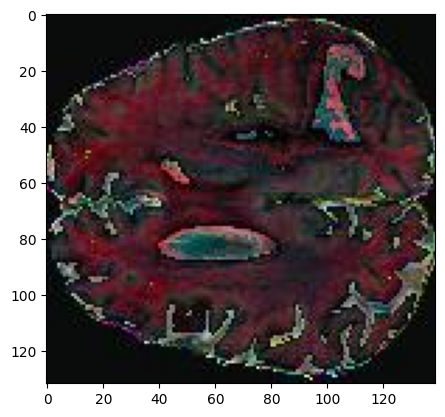

In [ ]:
img = Image.open('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/volume_100_slice_100_jpg.rf.ac33e0ac3a1eebeb5e262e8a6f7de5d9.jpg').convert('RGB')
print(img.size)
print(plt.imshow(img))

In [ ]:
df_train = pd.read_csv('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/train.csv')
df_train.drop('Unnamed: 0', inplace=True, axis=1)

df_test = pd.read_csv('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/test.csv')
df_test.drop('Unnamed: 0', inplace=True, axis=1)

df_val = pd.read_csv('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/valid.csv')
df_val.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df_train['Label'].value_counts()

Label
1    6745
0    4238
2    4058
Name: count, dtype: int64

In [ ]:
df_train['Filename'][0]

'volume_121_slice_89_jpg.rf.a914521e3e5df1b569da92f4cdc1a4fe.jpg'

(139, 132)
0
volume_121_slice_89_jpg.rf.a914521e3e5df1b569da92f4cdc1a4fe.jpg


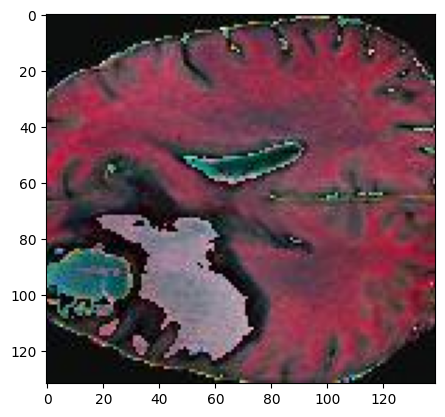

In [ ]:
i=0
path_img = '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/'

im = Image.open(path_img + df_train['Filename'][i]).convert('RGB')
print(im.size)
print(df_train['Label'][i])
print(df_train['Filename'][i])
plt.imshow(im)

(139, 132)
0
0.0
84.0
30.0
104.0
volume_121_slice_89_jpg.rf.a914521e3e5df1b569da92f4cdc1a4fe.jpg
/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/


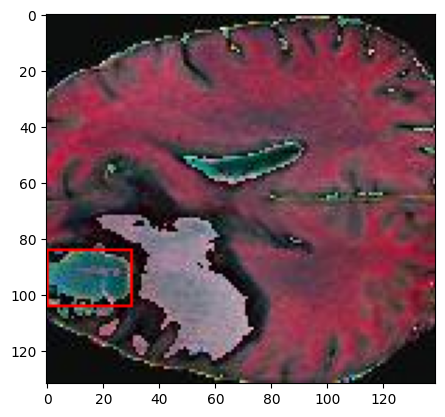

In [ ]:
i=0
path_img = '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/'
im = Image.open(path_img + df_train['Filename'][i]).convert('RGB')
print(im.size)
print(df_train['Label'][i])
print(df_train['x_min'][i])
print(df_train['y_min'][i])
print(df_train['x_max'][i])
print(df_train['y_max'][i])
print(df_train['Filename'][i])
print(df_train['path'][i])

draw = ImageDraw.Draw(im)
boxs = df_train[['x_min','y_min','x_max','y_max']].iloc[i]
draw.rectangle(boxs,width=1,outline="red") #xmin,ymin,xmax,ymax ,width=>ค.หนากรอบ
plt.imshow(im)

#Create Dataset

In [ ]:
!git clone https://github.com/PraeJi/Brain-Tumor-Detection.git

In [ ]:
%cd /content/Brain-Tumor-Detection

In [ ]:
from load_data import loadDataset

In [ ]:
%cd /content

In [ ]:
train_ = loadDataset(
    img_path= 'path',
    dataframe= df_train,
    x_col= 'Filename',
    y_col= 'Label',
    box_col=['x_min','y_min','x_max','y_max'],
    subset='train',
    #split=(0.7,0.2,0.1), #%train,%test,%valid
)

val_ = loadDataset(
    img_path= 'path',
    dataframe= df_val,
    x_col= 'Filename',
    y_col= 'Label',
    box_col=['x_min','y_min','x_max','y_max'],
    subset='valid',
    #split=(0.7,0.2,0.1),
)

test_ = loadDataset(
    img_path= 'path',
    dataframe= df_test,
    x_col= 'Filename',
    y_col= 'Label',
    box_col=['x_min','y_min','x_max','y_max'],
    subset='test',
    #split=(0.7,0.2,0.1),
)

In [ ]:
print(len(train_))
print(len(test_))
print(len(val_))

6851
973
1963


In [ ]:
'''train_.dataloader()
test_.dataloader()
val_.dataloader()'''

'train_.dataloader()\ntest_.dataloader()\nval_.dataloader()'

In [ ]:
#train_.augmentation_brightness(0.7,5)

In [ ]:
#train_.augmentation_blur(3,3)

In [ ]:
#train_.augmentation_rotate(90)

100%|██████████| 6851/6851 [00:51<00:00, 132.21it/s]


In [ ]:
#train_.augmentation_rotate(-90)

100%|██████████| 6851/6851 [00:44<00:00, 155.07it/s]


In [ ]:
df_train['Label'].value_counts()

Label
1    6745
0    4238
2    4058
Name: count, dtype: int64

In [ ]:
label_2_count = (df_train['Label'] == 2).sum()
label_0_count = (df_train['Label'] == 0).sum()

print(f"label 0: {label_0_count}")
print(f"label 2: {label_2_count}")

label 0: 4238
label 2: 4058


In [ ]:
for i in range(len(df_train)):
  if df_train['Label'] == 0:
    if i == ((df_train['Label'] == 0).sum())/2:
      break
    else:
      train_.augmentation_HVFlip()

In [ ]:
for i in range(len(df_train)):
  if df_train['Label'] == 2:
    if i == ((df_train['Label'] == 2).sum())/2:
      break
    else:
      train_.augmentation_HVFlip()

In [ ]:
#train_.plot_image(1)

# add augmented image in dataframe

In [ ]:
import os
from os import listdir

folder_train_img = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images"
folder_train_label = "/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels"


In [ ]:
df_augmented = []

In [ ]:
for img in os.listdir(folder_train_img):
  file_name = img[-4:]
  img_name = img[:-4]
  if file_name == '.png':
    os.rename(f"{img}", f"{img_name}+'.jpg'")

FileNotFoundError: [Errno 2] No such file or directory: 'volume_168_slice_98_jpg.rf.15083cbca620634ccd2640479fc95b89_roate90rev.png' -> "volume_168_slice_98_jpg.rf.15083cbca620634ccd2640479fc95b89_roate90rev+'.jpg'"

In [ ]:
# Calculate xmin,ymin,xmax,ymax

def calculate_train(filename,x_center,y_center,width,height):
  path_img = f"{folder_train_img}/{filename}"
  im = Image.open(path_img).convert("RGB")
  img_width, img_height = im.size

  x_center_pixel = x_center * img_width
  y_center_pixel = y_center * img_height
  half_width_pixel = width * img_width / 2
  half_height_pixel = height * img_height / 2

  x_min = x_center_pixel - half_width_pixel
  y_min = y_center_pixel - half_height_pixel
  x_max = x_center_pixel + half_width_pixel
  y_max = y_center_pixel + half_height_pixel

  return x_min,y_min,x_max,y_max

In [ ]:
for labels_file in os.listdir(folder_train_label):
  file_path = f"{folder_train_label}/{labels_file}"
  file = open(file_path,"r")
  content = file.readlines()
  filename = labels_file[:-4] + '.jpg'

  for line in content:
    parts = line.strip().split()
    label = int(parts[0])
    x_center = float(parts[1])
    y_center = float(parts[2])
    width = float(parts[3])
    height = float(parts[4])

    x_min,y_min,x_max,y_max = calculate_train(filename,x_center,y_center,width,height)

    df_augmented.append({
      'Filename': filename,
      'Label': int(label),
      'x_Center': x_center,
      'y_Center': y_center,
      'width': width,
      'height': height,
      'x_min': x_min,
      'y_min': y_min,
      'x_max': x_max,
      'y_max': y_max,
      'path' : f"{folder_train_img}/"
    })

  file.close

FileNotFoundError: [Errno 2] No such file or directory: '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/volume_299_slice_103_jpg.rf.b6b78b19ef1677fbec378a1bec82c7ad_HorizontalFlip.jpg'

# Train

In [ ]:
'''from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)'''

In [ ]:
'''# Use the model
model.train(data="/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml", epochs=50)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format'''

# Test

In [ ]:
'''from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/set_yolov8/data/runs/detect/train/weights/best.pt')

# Path to the test images directory
test_images_dir = '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images'

# Perform detection on test images and save results
results = model.predict(source=test_images_dir, save=True, save_txt=True)'''

In [ ]:
'''display.Image('/content/set_yolov8/data/runs/detect/train/results.png')'''

In [ ]:
'''display.Image('/content/set_yolov8/data/runs/detect/train/confusion_matrix_normalized.png')'''

In [ ]:
'''i=5
path_img = '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images/'
im = Image.open(path_img + df_test['Filename'][i]).convert('RGB')
print(im.size)
print(df_test['Label'][i])
print(df_test['x_min'][i])
print(df_test['y_min'][i])
print(df_test['x_max'][i])
print(df_test['y_max'][i])
print(df_test['Filename'][i])
print(df_test['path'][i])

draw = ImageDraw.Draw(im)
boxs = df_test[['x_min','y_min','x_max','y_max']].iloc[i]
draw.rectangle(boxs,width=1,outline="red") #xmin,ymin,xmax,ymax ,width=>ค.หนากรอบ
plt.imshow(im)'''

In [ ]:
'''img = Image.open('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images/volume_336_slice_106_jpg.rf.9672b03cda1146a8dbd6cece7f62e2f1.jpg')
plt.imshow(img)'''

In [ ]:
'''img_pred = Image.open('/content/set_yolov8/data/runs/detect/predict/volume_336_slice_106_jpg.rf.9672b03cda1146a8dbd6cece7f62e2f1.jpg')
plt.imshow(img_pred)'''

In [ ]:
#i=0
#path_img = '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images/'
#im = Image.open('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images/volume_100_slice_48_jpg.rf.7bc34aee05abcdb930d48b8f69044264.jpg').convert('RGB')
#label = open('/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/labels/volume_100_slice_48_jpg.rf.7bc34aee05abcdb930d48b8f69044264.txt',"r")
#content = file.readlines()
'''
img = 'volume_136_slice_112_jpg.rf.7fd82b1d044d713df160a506518caa1f.jpg'
path_img = '/content/set_yolov8/data/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images/'

for i in range(len(df_test)):
  if df_test['Filename'][i]==img :
    im = Image.open(path_img + df_test['Filename'][i]).convert('RGB')
    print(im.size)
    print(df_test['Label'][i])
    print(df_test['x_min'][i])
    print(df_test['y_min'][i])
    print(df_test['x_max'][i])
    print(df_test['y_max'][i])
    print(df_test['Filename'][i])
    print(df_test['path'][i])

    draw = ImageDraw.Draw(im)
    boxs = df_test[['x_min','y_min','x_max','y_max']].iloc[i]
    draw.rectangle(boxs,width=1,outline="red") #xmin,ymin,xmax,ymax ,width=>ค.หนากรอบ

plt.imshow(im)'''

In [ ]:
'''import os
from PIL import Image
import matplotlib.pyplot as plt

path = '/content/set_yolov8/data/runs/detect/predict/'
images_shown = 0

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i in os.listdir(path):
    item_path = path + i
    if os.path.isfile(item_path) and item_path.lower().endswith('.jpg'):  # Check if it's an image file
        img = Image.open(item_path)

        plt.subplot(3, 3, images_shown + 1)  # 3 rows, 3 columns of images
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels

        images_shown += 1
        if images_shown >= 9:
            break

plt.tight_layout()  # Adjust spacing between subplots
plt.show()'''